<h1 style="color:red;"> CAR PRICE PREDICTION</h1>


Installing important imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Loading our Dataset

In [4]:
# Reading the CSV file using Pandas
Cars_df = pd.read_csv('car data.csv')

Getting the shape of the dataset, displaying the first 5 rows and last 5 rows

In [5]:
Cars_df.shape

(301, 9)

In [6]:
Cars_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
Cars_df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


Checking how many brands of cars do we have?

In [15]:
unique_car_names_count = Cars_df['Car_Name'].nunique()
print(unique_car_names_count)


98


In [16]:
Cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [17]:
Cars_df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [18]:
Cars_df.duplicated().sum()

2

In [25]:
Cars_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [19]:
Cars_df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Machine Learning for Predicting the prices of Cars

In [20]:
Cars_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<h2> Feature Selection <h2>

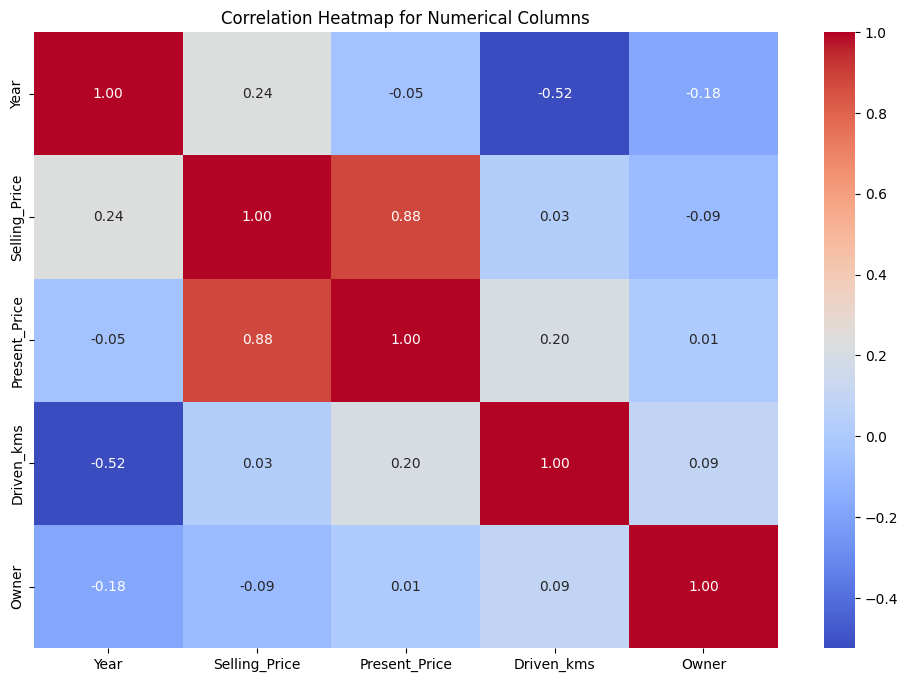

In [23]:
# Filter out non-numerical columns
numerical_columns = Cars_df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = Cars_df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()


Defining the variables

In [35]:
# Features (Independent Variables)
X = Cars_df.drop(['Selling_Price', 'Car_Name'], axis=1)

# Target (Dependent Variable)
y = Cars_df['Selling_Price']


OneHot Encoding

In [51]:
# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)


Train Test Slipt and Scale the Data 

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
X = Cars_df.drop(['Selling_Price', 'Car_Name'], axis=1)
y = Cars_df['Selling_Price']

X_encoded = pd.get_dummies(X, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)


Choosing our Model : RandomForestRegressor

In [66]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

Looking at the Score of our Model using Metrics

In [67]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict on the test set
y_pred = rf.predict(X_test_scaled)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


R^2 Score: 0.9635778536357699
Mean Squared Error (MSE): 0.8390054309836057


User input for the car

In [85]:
# Example data for prediction (Replace with your own data)
new_data = {
    'Year': [2019],
    'Present_Price': [8.50],
    'Driven_kms': [90000],
    #'Fuel_Type_Diesel': [1], 
    'Fuel_Type': [1],  
    'Selling_type': [0],  
    'Transmission': [1], 
    'Owner': [1]
}

# Create a DataFrame for new data
new_data_df = pd.DataFrame(new_data)

Predicting the prices of The car based on the user input 

In [86]:
# One-hot encode the new data using the same encoding as X
new_data_encoded = pd.get_dummies(new_data_df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Align columns of new_data_encoded with X_train_scaled
new_data_encoded_aligned = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Standardize the new data using the same scaler
new_data_scaled = scaler.transform(new_data_encoded_aligned)

# Predict the selling price
predicted_price = rf.predict(new_data_scaled)

print(f"Predicted Selling Price: {predicted_price[0]:.2f}")


Predicted Selling Price: 6.39
